In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
# Get current working directory (where notebook is running)
notebook_dir = os.getcwd()

# Path to data folder inside notebooks
data_file_path = os.path.join(notebook_dir, "data",'flight_data.csv')

In [3]:
data_file_path

'D:\\Learning\\gems_prediction-ml-project\\notebook\\data\\flight_data.csv'

In [4]:
data = pd.read_csv(data_file_path)

In [5]:
data.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [7]:
data.shape

(300153, 12)

In [8]:
data.isnull().sum()

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [9]:
columns = data.columns

In [10]:
columns

Index(['Unnamed: 0', 'airline', 'flight', 'source_city', 'departure_time',
       'stops', 'arrival_time', 'destination_city', 'class', 'duration',
       'days_left', 'price'],
      dtype='object')

In [11]:
print('Unique values in data')
print("-"*24)

for col in columns:
    print(f"{col}:{data[col].nunique()}")

Unique values in data
------------------------
Unnamed: 0:300153
airline:6
flight:1561
source_city:6
departure_time:6
stops:3
arrival_time:6
destination_city:6
class:2
duration:476
days_left:49
price:12157


In [12]:
data.drop(columns=['Unnamed: 0','flight'], inplace=True)

In [13]:
data

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [15]:
cat_features = [features for features in data.columns if data[features].dtype == 'O']
print(len(cat_features))
print(cat_features)

7
['airline', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class']


In [16]:
categorical_cols = data.select_dtypes(include=['object','category']).columns.tolist()
numeric_cols = data.select_dtypes(include=['number']).columns.tolist()

In [17]:
print("Categorical columns:", categorical_cols)
print("Numeric columns:", numeric_cols)

Categorical columns: ['airline', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class']
Numeric columns: ['duration', 'days_left', 'price']


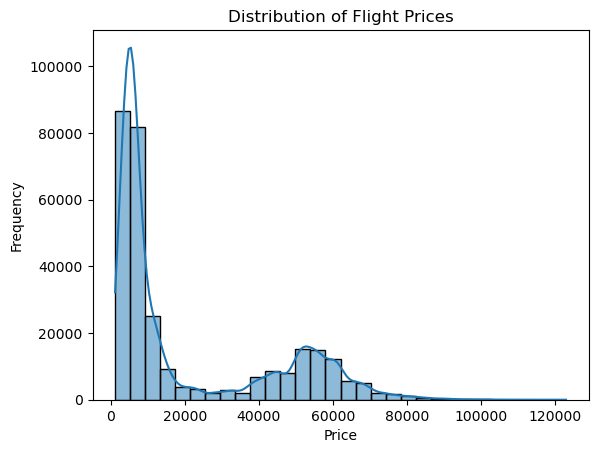

In [18]:
# Visualize the distribution of flight prices
sns.histplot(data['price'], bins=30, kde=True)
plt.title('Distribution of Flight Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

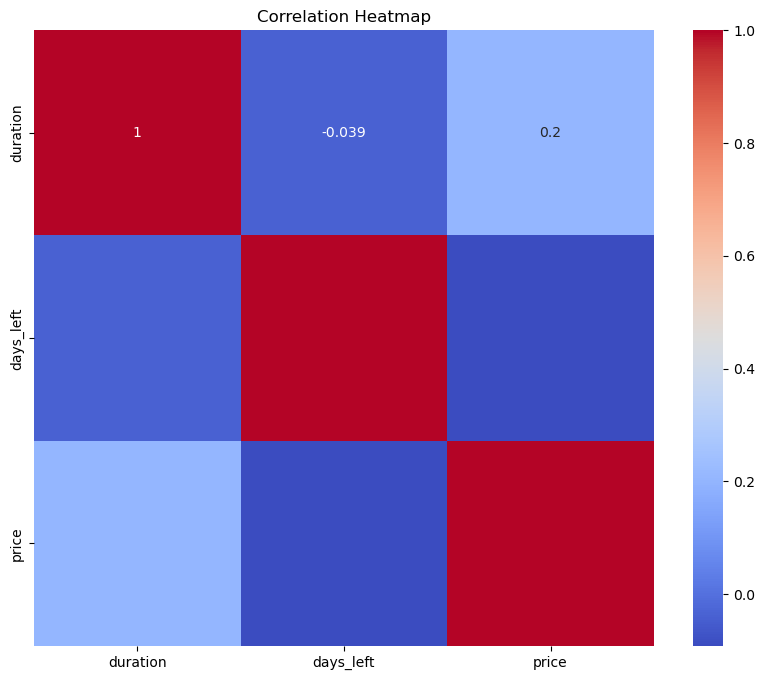

In [19]:
# Correlation heatmap for numeric features in clean_df
numeric_df = data.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [20]:
count = data.airline.value_counts()

percentage = data.airline.value_counts(normalize=True)*100

freq_table = pd.DataFrame({'Frequency':count,'Percent':percentage})

freq_table

,Frequency,Percent
airline,,
Vistara,127859,42.597942
Air_India,80892,26.950255
Indigo,43120,14.366007
GO_FIRST,23173,7.720396
AirAsia,16098,5.363265
SpiceJet,9011,3.002136


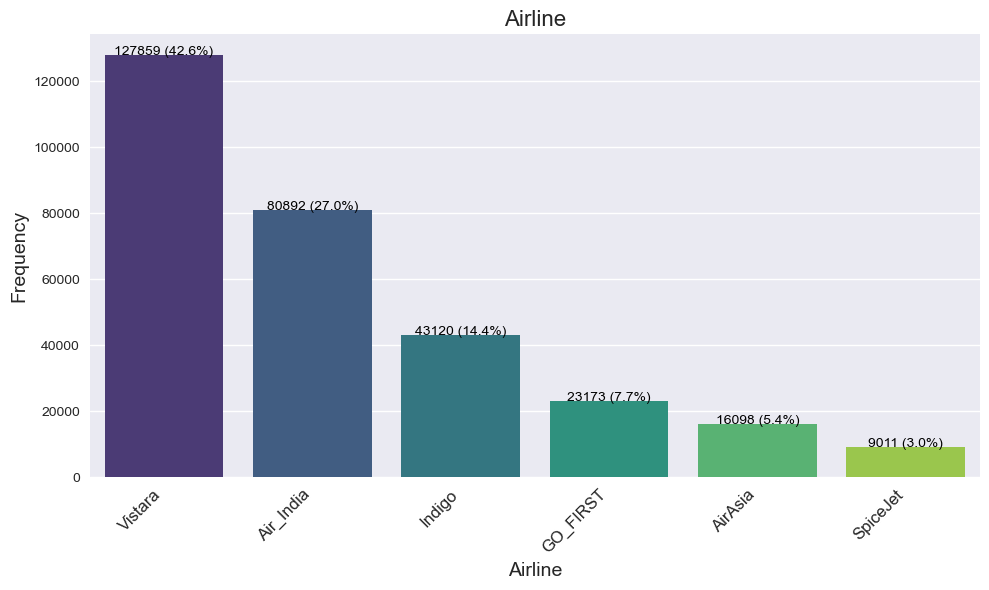

In [21]:
plt.figure(figsize=(10, 6))
plt.style.use('seaborn-v0_8')

ax = sns.barplot(x=freq_table.index, y="Frequency", data=freq_table, palette="viridis")

for i, (freq, perc) in enumerate(zip(freq_table['Frequency'], freq_table['Percent'])):

    ax.text(i, freq + 0.5, f'{freq} ({perc:.1f}%)', ha='center', fontsize=10, color='black')


plt.xticks(rotation=45, ha='right', fontsize=12)
plt.xlabel("Airline", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.title("Airline", fontsize=16)
plt.tight_layout()

plt.show()

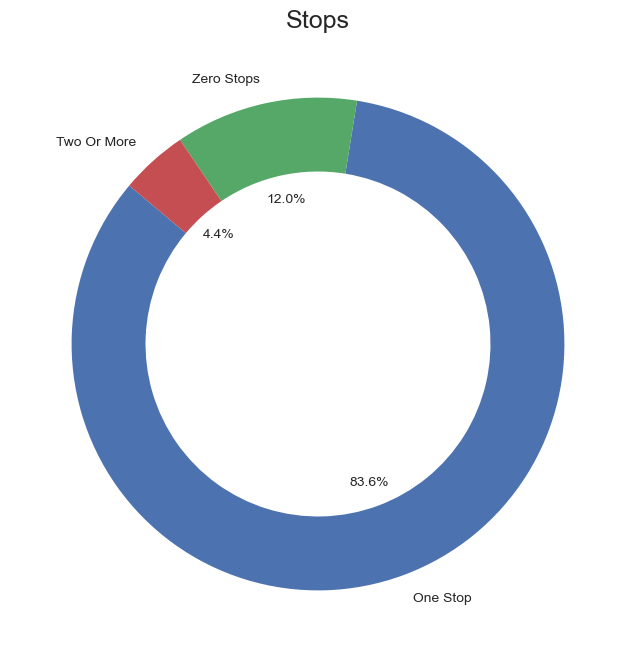

In [22]:
counts = data['stops'].value_counts()

plt.figure(figsize=(8, 8))

plt.pie(counts, labels=['One Stop','Zero Stops','Two Or More'], autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.3))  

plt.title("Stops", fontsize=18)


plt.show()

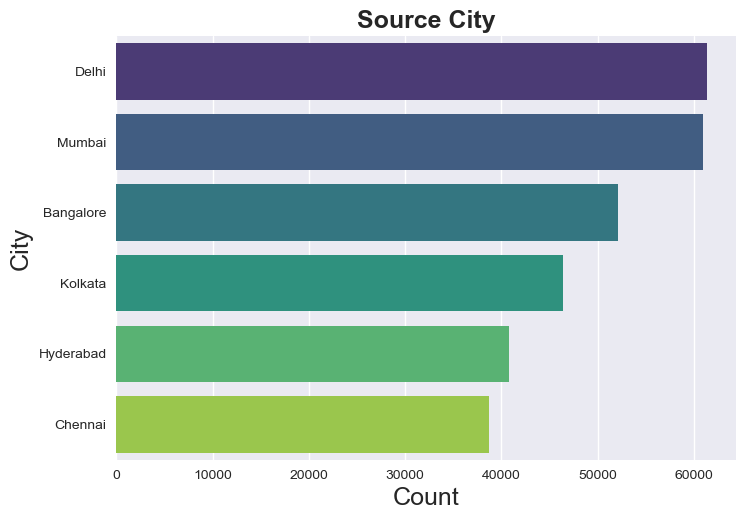

In [23]:
counts = data['source_city'].value_counts()
sns.barplot(y=counts.index,x=counts,palette='viridis')
plt.title('Source City',fontsize=18,fontweight='600')
plt.xlabel('Count',fontsize=18)
plt.ylabel('City',fontsize=18)
plt.show()

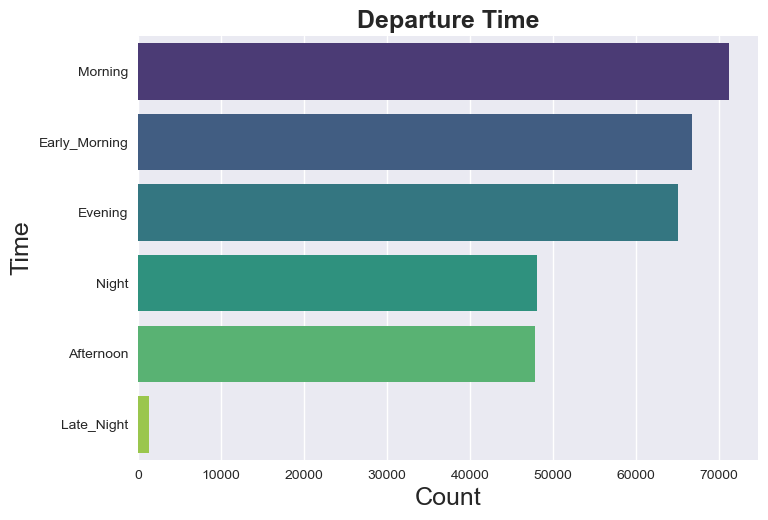

In [24]:
counts = data['departure_time'].value_counts()
sns.barplot(y=counts.index,x=counts,palette='viridis')
plt.title('Departure Time',fontsize=18,fontweight='600')
plt.xlabel('Count',fontsize=18)
plt.ylabel('Time',fontsize=18)
plt.show()

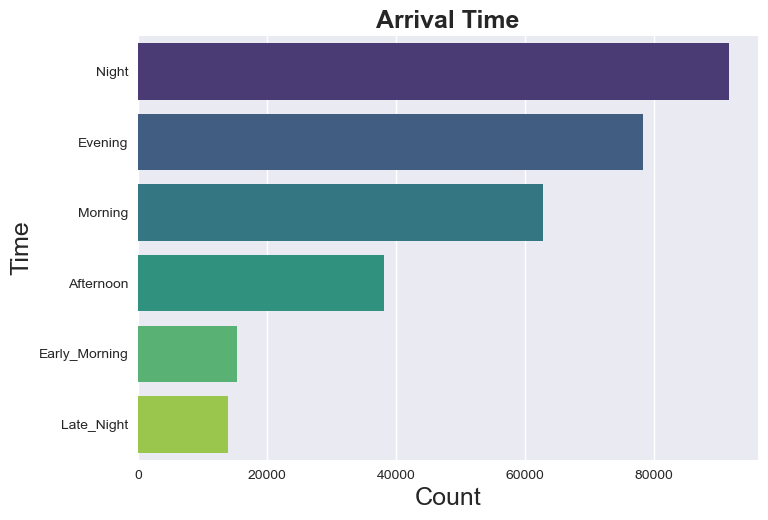

In [25]:
counts = data['arrival_time'].value_counts()

sns.barplot(y=counts.index,x=counts,palette='viridis')

plt.title('Arrival Time',fontsize=18,fontweight='600')

plt.xlabel('Count',fontsize=18)

plt.ylabel('Time',fontsize=18)

plt.show()

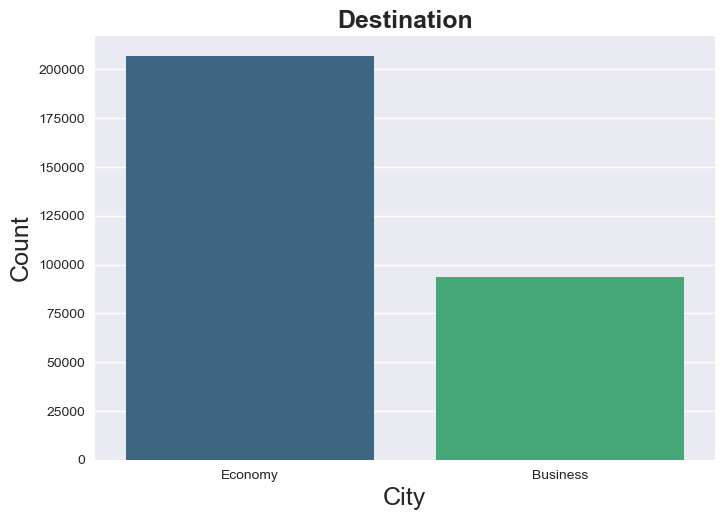

In [26]:
counts = data['class'].value_counts()

sns.barplot(x=counts.index,y=counts,palette='viridis')

plt.title('Destination',fontsize=18,fontweight='600')

plt.ylabel('Count',fontsize=18)

plt.xlabel('City',fontsize=18)

plt.show()

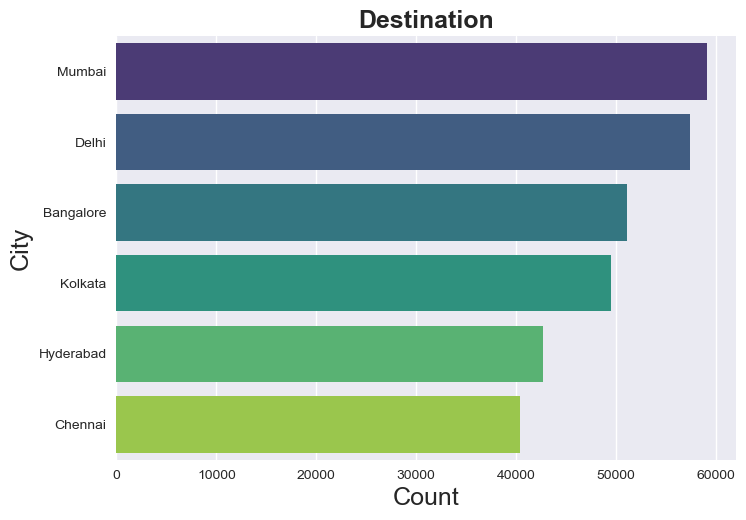

In [27]:
counts = data['destination_city'].value_counts()

sns.barplot(y=counts.index,x=counts,palette='viridis')

plt.title('Destination',fontsize=18,fontweight='600')

plt.xlabel('Count',fontsize=18)

plt.ylabel('City',fontsize=18)

plt.show()

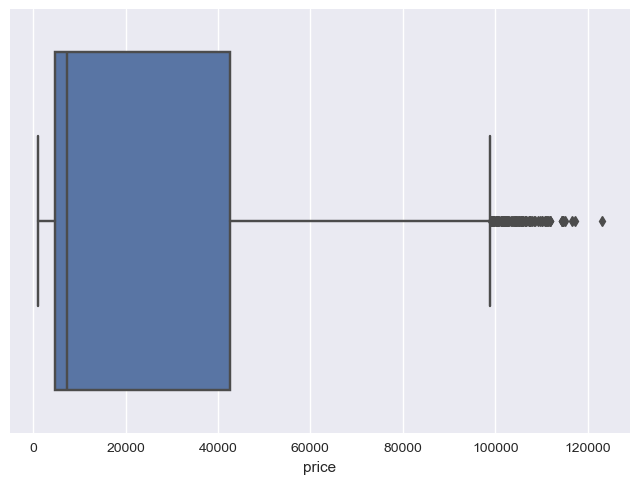

In [28]:
sns.boxplot(x=data['price'])
plt.show()

## Detecting Outliers

In [29]:
Q1 = data['price'].quantile(0.25)

Q3 = data['price'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR

upper_bound = Q3 + 1.5 * IQR

outliers = data[(data['price'] < lower_bound) | (data['price'] > upper_bound)]

outliers

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
215858,Vistara,Delhi,Evening,two_or_more,Evening,Kolkata,Business,21.08,1,114434
215859,Vistara,Delhi,Evening,two_or_more,Evening,Kolkata,Business,21.08,1,116562
216025,Vistara,Delhi,Evening,two_or_more,Morning,Kolkata,Business,17.58,4,100395
216094,Vistara,Delhi,Morning,one,Evening,Kolkata,Business,6.50,5,99129
216095,Vistara,Delhi,Morning,one,Evening,Kolkata,Business,8.00,5,101369
...,...,...,...,...,...,...,...,...,...,...
293474,Vistara,Chennai,Morning,one,Night,Bangalore,Business,9.67,3,107597
296001,Vistara,Chennai,Night,one,Morning,Kolkata,Business,11.50,3,102832
296081,Vistara,Chennai,Early_Morning,one,Night,Kolkata,Business,15.83,5,102384
296170,Vistara,Chennai,Night,one,Morning,Kolkata,Business,11.50,7,104624


In [30]:
outliers.duration.describe()


count    123.000000
mean      14.403171
std        5.388195
min        5.920000
25%       10.710000
50%       13.330000
75%       17.125000
max       28.170000
Name: duration, dtype: float64

In [31]:
outliers['class'].value_counts()

class
Business    123
Name: count, dtype: int64

In [32]:
data = data[(data['price'] >= lower_bound) & (data['price'] <= upper_bound)]

In [33]:
data.shape

(300030, 10)

In [34]:
data['class'].value_counts()

class
Economy     206666
Business     93364
Name: count, dtype: int64

In [35]:
data.duplicated().sum() # check duplicate values

2213

In [36]:
data.describe()

,duration,days_left,price
count,300030.000000,300030.000000,300030.000000
mean,12.220126,26.012009,20855.326674
std,7.192515,13.557878,22638.775853
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,98972.000000


In [37]:
print("Categorical columns:", categorical_cols)

Categorical columns: ['airline', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class']


In [38]:
for col in categorical_cols:
    print(f"Categories in '{col}' variable: {data[col].unique()}")

Categories in 'airline' variable: ['SpiceJet' 'AirAsia' 'Vistara' 'GO_FIRST' 'Indigo' 'Air_India']
Categories in 'source_city' variable: ['Delhi' 'Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai']
Categories in 'departure_time' variable: ['Evening' 'Early_Morning' 'Morning' 'Afternoon' 'Night' 'Late_Night']
Categories in 'stops' variable: ['zero' 'one' 'two_or_more']
Categories in 'arrival_time' variable: ['Night' 'Morning' 'Early_Morning' 'Afternoon' 'Evening' 'Late_Night']
Categories in 'destination_city' variable: ['Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai' 'Delhi']
Categories in 'class' variable: ['Economy' 'Business']


# Feature Engineering

## Creating price per duration col

In [39]:
data

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [40]:
data['price_per_duration'] = round(data['price']/data['duration'],2)

In [41]:
data

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,price_per_duration
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,2743.32
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,2554.94
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,2744.70
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,2646.67
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,2555.79
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265,6871.53
300149,Vistara,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105,7399.71
300150,Vistara,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099,5719.38
300151,Vistara,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585,8158.50


In [42]:
data.drop(columns=['price_per_duration'],inplace=True)

In [43]:
data

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


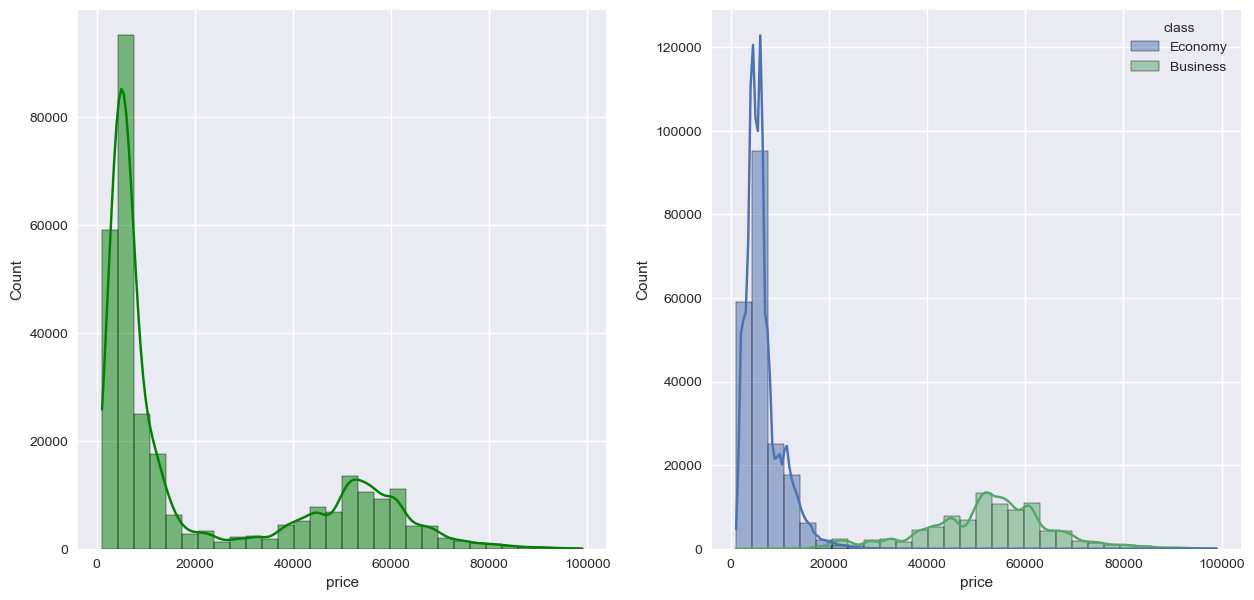

In [44]:
fig, axs = plt.subplots(1,2,figsize=(15,7))

plt.subplot(1,2,1)
sns.histplot(data=data, x='price',bins=30, kde=True, color='g')
plt.subplot(1,2,2)
sns.histplot(data=data, x='price',bins=30, kde=True, hue='class')
plt.show()

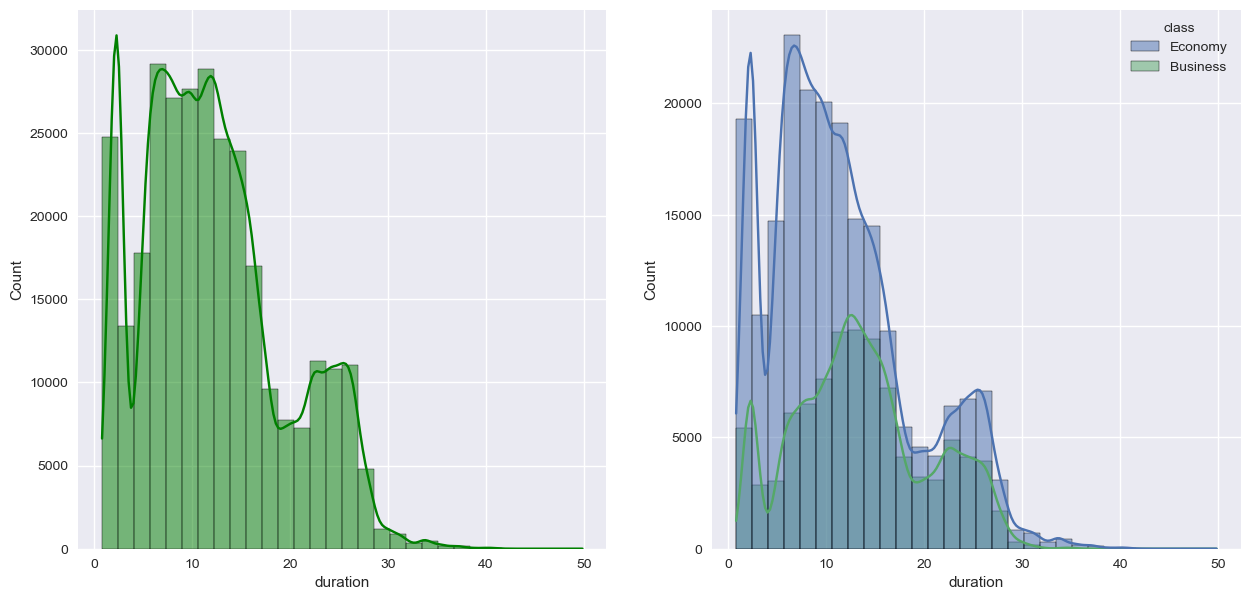

In [45]:
fig, axs = plt.subplots(1,2,figsize=(15,7))

plt.subplot(1,2,1)
sns.histplot(data=data, x='duration',bins=30, kde=True, color='g')
plt.subplot(1,2,2)
sns.histplot(data=data, x='duration',bins=30, kde=True, hue='class')
plt.show()

# Data Encoding

In [54]:
df=data.copy(deep=True)

In [55]:
data

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [56]:
df

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [57]:
df.duplicated().sum()


2213

In [58]:
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)

In [59]:
df.shape

(297817, 10)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297817 entries, 0 to 297816
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           297817 non-null  object 
 1   source_city       297817 non-null  object 
 2   departure_time    297817 non-null  object 
 3   stops             297817 non-null  object 
 4   arrival_time      297817 non-null  object 
 5   destination_city  297817 non-null  object 
 6   class             297817 non-null  object 
 7   duration          297817 non-null  float64
 8   days_left         297817 non-null  int64  
 9   price             297817 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 22.7+ MB


In [61]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for feature in cat_features:
    df[feature] = le.fit_transform(df[feature])


df.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,2,2,2,5,5,1,2.17,1,5953
1,4,2,1,2,4,5,1,2.33,1,5953
2,0,2,1,2,1,5,1,2.17,1,5956
3,5,2,4,2,0,5,1,2.25,1,5955
4,5,2,4,2,4,5,1,2.33,1,5955


In [62]:
X = df.drop('price',axis=1)
y = df['price']

In [63]:
X

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
0,4,2,2,2,5,5,1,2.17,1
1,4,2,1,2,4,5,1,2.33,1
2,0,2,1,2,1,5,1,2.17,1
3,5,2,4,2,0,5,1,2.25,1
4,5,2,4,2,4,5,1,2.33,1
...,...,...,...,...,...,...,...,...,...
297812,5,1,4,0,2,3,0,10.08,49
297813,5,1,0,0,5,3,0,10.42,49
297814,5,1,1,0,5,3,0,13.83,49
297815,5,1,1,0,2,3,0,10.00,49


In [64]:
y

0          5953
1          5953
2          5956
3          5955
4          5955
          ...  
297812    69265
297813    77105
297814    79099
297815    81585
297816    81585
Name: price, Length: 297817, dtype: int64

In [65]:
processed_data_path = os.path.join(notebook_dir, "data")

In [70]:
processed_X_path = os.path.join(processed_data_path,'X')

In [67]:
processed_y_path = os.path.join(processed_data_path,'y')

In [68]:
os.makedirs(os.path.dirname(processed_data_path), exist_ok=True)

In [ ]:
proce

In [71]:
import joblib

# Save
joblib.dump(X, processed_X_path)
joblib.dump(y, processed_y_path)

['D:\\Learning\\gems_prediction-ml-project\\notebook\\data\\y']

In [ ]:
numeric_cols = X.select_dtypes(include=['int64','float64','int32']).columns.tolist()  #remove 'price' from numeric_col list

In [ ]:
numeric_cols

In [ ]:
numeric_cols_transformer = StandardScaler()
catagorical_cols_transformer = OrdinalEncoder()

In [ ]:
data_transformation = ColumnTransformer(
                [
                    ("OrdinalEncoder",catagorical_cols_transformer, categorical_cols),
                    ("StandardScaler",numeric_cols_transformer,numeric_cols),
                ]
            )

In [ ]:
y

In [ ]:
X = data_transformation.fit_transform(X)

In [ ]:
X.shape

In [ ]:
X

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True,random_state=42)

In [ ]:
X_train.shape, X_test.shape

In [ ]:
processed_file = 'train_test_splits.joblib'

In [ ]:
processed_file_path